# **SETUP**

In [1]:
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
scaler_input = StandardScaler()
scaler_output = StandardScaler()
import os
scaler_input = StandardScaler()
scaler_output = StandardScaler()

# **LOADING DATA**

In [2]:

SteadyState_Input = []

base_path = r'C:\\Users\\ismai\\OneDrive\\Desktop\\CFD Dissertation\\Files\\CSV training\\SteadyCSV'

transient_base_path = r'C:\\Users\\ismai\\OneDrive\\Desktop\\CFD Dissertation\\Files\\CSV training\\ML_OutputLowMaxSS_CSV'

Transient_Output = []

for i in range(1, 41):  # Loop from N1 to N40
    # Construct the steady state file path
    steady_folder_name = f"N{i}Steady"
    steady_file_name = f"N{i}SSS.csv"
    steady_file_path = os.path.join(base_path, steady_folder_name, steady_file_name)
    
    # Construct the transient file path (assuming a similar naming convention)
    transient_folder_name = f"N{i}"
    transient_file_name = f"N{i}TS2.csv"
    transient_file_path = os.path.join(transient_base_path, transient_folder_name, transient_file_name)

      
    NP = pd.read_csv(steady_file_path)
    NP = NP.replace(' null', 0)
    NPSteady_velocity = NP.iloc[:, 4].values.reshape(-1, 1)
    NPSteady_velocity = scaler_input.fit_transform(NPSteady_velocity)
    SteadyState_Input.append(NPSteady_velocity)

    # Process the transient CSV
    NT = pd.read_csv(transient_file_path)
    NT = NT.replace(' null', 0)
    NPTransient_velocity = NT.iloc[:, 4].values.reshape(-1, 1)
    NPTransient_velocity = scaler_output.fit_transform(NPTransient_velocity)
    Transient_Output.append(NPTransient_velocity)

# **MLP**

In [6]:
#https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
#https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
SteadyState_Input_MLP = np.concatenate(SteadyState_Input)
Transient_Output_MLP = np.concatenate(Transient_Output)
Steady_train, Steady_test, Transient_train, Transient_test = train_test_split(SteadyState_Input_MLP, Transient_Output_MLP, test_size=0.2, random_state=42)

# Initialize MLPRegressor

MLP = MLPRegressor(       #(mention)
    hidden_layer_sizes=(32, 64, 64),
    activation='relu',                
    solver='adam',                     
    alpha=0.0001,                      
    batch_size='auto',                
    learning_rate_init=0.001,          
    max_iter=300,                     
    random_state=42,
                       
)
# Fit MLPRegressor
MLP.fit(Steady_train, Transient_train)

# Make predictions
TransientPredictions = MLP.predict(Steady_test)


from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Transient_test, TransientPredictions)
print(f"Model performance:\nMSE: {mse}")

c:\Users\ismai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model performance:
MSE: 0.04275708855324755


# **PREDICTION**

In [7]:
# https://keras.io/api/models/model_training_apis/
SteadyState_New0 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N0\N0SSS.csv')
SteadyState_New1 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N41\N41SSS.csv')
SteadyState_New2 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N42\N42SSS.csv')
SteadyState_New3 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N43\N43SSS.csv')
SteadyState_New4 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N44\N44SSS.csv')
SteadyState_New0 = SteadyState_New0.replace(' null', 0)
SteadyState_New1 = SteadyState_New1.replace(' null', 0)
SteadyState_New2 = SteadyState_New2.replace(' null', 0)
SteadyState_New3 = SteadyState_New3.replace(' null', 0)
SteadyState_New4 = SteadyState_New4.replace(' null', 0)
SteadyStateVelocity_0 = SteadyState_New0.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_1 = SteadyState_New1.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_2 = SteadyState_New2.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_3 = SteadyState_New3.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_4 = SteadyState_New4.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_0 = scaler_input.transform(SteadyStateVelocity_0 )
SteadyStateVelocity_1 = scaler_input.transform(SteadyStateVelocity_1 )
SteadyStateVelocity_2 = scaler_input.transform(SteadyStateVelocity_2 )
SteadyStateVelocity_3 = scaler_input.transform(SteadyStateVelocity_3 )
SteadyStateVelocity_4 = scaler_input.transform(SteadyStateVelocity_4 )
Prediction0 = MLP.predict(SteadyStateVelocity_0)
Prediction1 = MLP.predict(SteadyStateVelocity_1)
Prediction2 = MLP.predict(SteadyStateVelocity_2)
Prediction3 = MLP.predict(SteadyStateVelocity_3)
Prediction4 = MLP.predict(SteadyStateVelocity_4)
Prediction0 = scaler_output.inverse_transform(Prediction0.reshape(-1, 1))
Prediction1 = scaler_output.inverse_transform(Prediction1.reshape(-1, 1))
Prediction2 = scaler_output.inverse_transform(Prediction2.reshape(-1, 1))
Prediction3 = scaler_output.inverse_transform(Prediction3.reshape(-1, 1))
Prediction4 = scaler_output.inverse_transform(Prediction4.reshape(-1, 1))
SteadyState_New0 ['Transient Prediction 0'] = Prediction0
SteadyState_New1 ['Transient Prediction 1'] = Prediction1
SteadyState_New2 ['Transient Prediction 2'] = Prediction2
SteadyState_New3 ['Transient Prediction 3'] = Prediction3
SteadyState_New4 ['Transient Prediction 4'] = Prediction4
print(Prediction0)
print(Prediction1)
print(Prediction2)
print(Prediction3)
print(Prediction4)
SteadyState_New0.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N0MS.csv', index=False)
SteadyState_New1.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N41MS.csv', index=False)
SteadyState_New2.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N42MS.csv', index=False)
SteadyState_New3.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N43MS.csv', index=False)
SteadyState_New4.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N44MS.csv', index=False)


[[0.08988327]
 [0.08752045]
 [0.08687605]
 ...
 [0.22310668]
 [0.06496626]
 [0.213187  ]]
[[2.78315833]
 [2.55684891]
 [2.28644935]
 [0.82375286]
 [0.54663418]
 [0.6967087 ]
 [2.36033135]
 [2.49688568]
 [2.80947084]
 [1.58250328]
 [1.18790941]
 [0.99779163]
 [1.85147163]
 [2.02301622]
 [2.32922314]
 [2.64983179]
 [2.59692096]
 [2.75656156]
 [2.99063163]
 [2.94004125]
 [2.12894324]
 [2.70309944]
 [0.59119515]
 [0.41958516]
 [0.53390247]
 [0.50843906]
 [2.67636838]
 [2.44412505]
 [2.7298305 ]
 [1.49272783]
 [1.21876733]
 [1.38339921]
 [1.02283473]
 [1.01032399]
 [1.38054483]
 [1.53525305]
 [0.70310752]
 [0.6495467 ]
 [2.0190858 ]
 [1.8561554 ]
 [2.27089473]
 [0.73190905]
 [0.86287927]
 [2.36033135]
 [2.51914417]
 [0.41643121]
 [0.88628071]
 [1.03449778]
 [2.55449236]
 [1.0789646 ]
 [1.15414724]
 [1.24370692]
 [0.83027393]
 [0.94452913]
 [1.21259574]
 [1.59904087]
 [1.10014177]
 [1.2880292 ]
 [0.6264944 ]
 [2.27672793]
 [2.88814597]
 [2.91431728]
 [3.09126657]
 [1.81634333]
 [1.60849091]


# **RESULT N0**

In [8]:
print(PredictedTransient0.columns)

NameError: name 'PredictedTransient0' is not defined

In [9]:
PredictedTransient0 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N0MS.csv')
# Print column names
print(PredictedTransient0.columns)
PredictedTransient0 = PredictedTransient0.fillna(0)
PredictedTransient0 = PredictedTransient0.replace(' null', np.nan)
x = PredictedTransient0[' X [ m ]']
y = PredictedTransient0[' Y [ m ]']
ste_velocity = PredictedTransient0[' Wall Shear [ Pa ]']
velocity = PredictedTransient0['Transient Prediction 0']
diff_ste = PredictedTransient0['Transient Prediction 0'] - PredictedTransient0[' Wall Shear [ Pa ]']
CFDTransient0 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N0tlow\N0TS2.csv')
print(CFDTransient0.columns)
CFDTransient0 = CFDTransient0.fillna(0)
CFDTransient0 = CFDTransient0.replace(' null', np.nan)
x = CFDTransient0 [' X [ m ]']
y = CFDTransient0 [' Y [ m ]']
velocity_truth = CFDTransient0 [' Wall Shear [ Pa ]']
diff_vel = PredictedTransient0['Transient Prediction 0'] - CFDTransient0[' Wall Shear [ Pa ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]', ' Wall Shear [ Pa ]',
       'Transient Prediction 0'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Wall Shear [ Pa ]'],
      dtype='object')


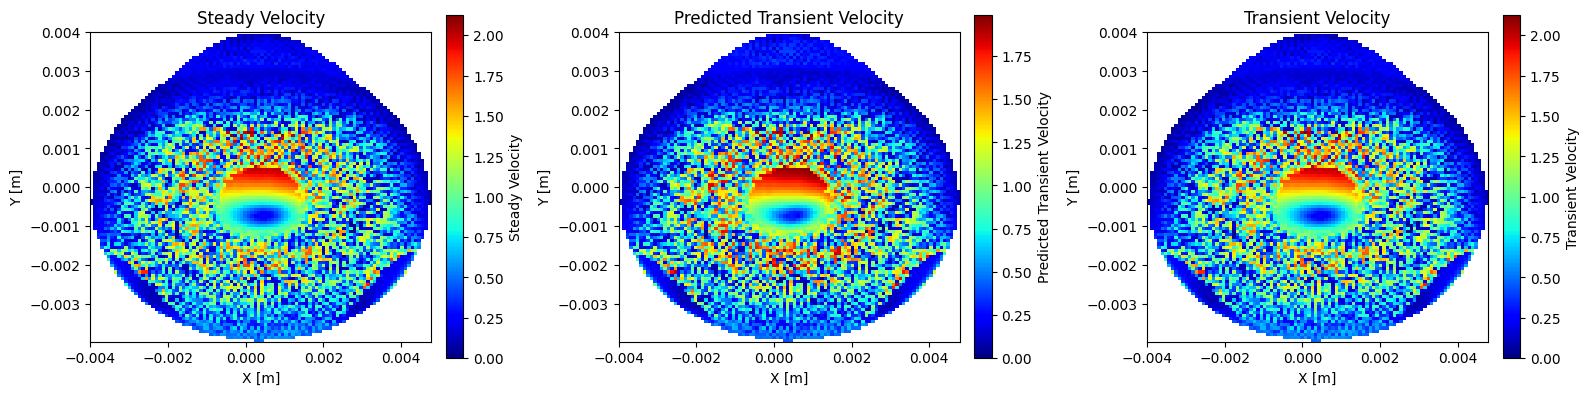

In [10]:
# Generate your grid
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, y), ste_velocity, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, y), velocity, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, y), velocity_truth, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, y), diff_vel, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, y), diff_ste, (grid_x, grid_y), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Generate heat maps for velocity
#plt.subplot(1, 1, 1)
fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(16, 26))
fig.patch.set_facecolor('white')
rotated_masked_velocity0 = np.rot90(masked_velocity2, 1)
rotated_masked_velocity1 = np.rot90(masked_velocity1, 1)

# Plot the rotated data
im0 = ax0.imshow(rotated_masked_velocity0.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity0.max())
fig.colorbar(im0, ax=ax0, label='Steady Velocity', fraction=0.046, pad=0.04)
ax0.set_title('Steady Velocity')
ax0.set_xlabel("X [m]")
ax0.set_ylabel("Y [m]")

im1 = ax1.imshow(rotated_masked_velocity1.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity1.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity', fraction=0.046, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Y [m]")

rotated_masked_velocity2 = np.rot90(masked_velocity2, 1)

im2 = ax2.imshow(rotated_masked_velocity2.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity', fraction=0.046, pad=0.04)
ax2.set_title('Transient Velocity')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Y [m]")
# Save the figure to a file with 600x600 pixels

plt.tight_layout()
plt.show()

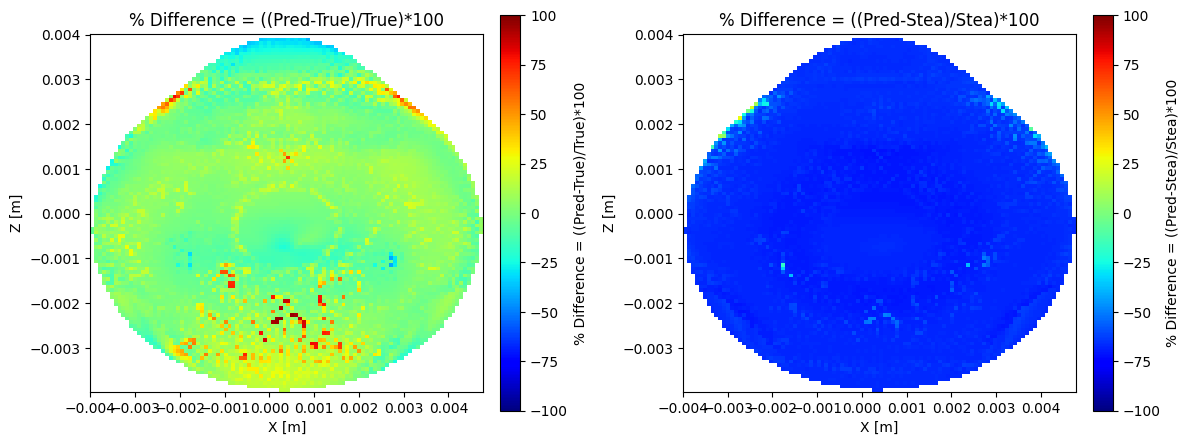

<Figure size 640x480 with 0 Axes>

In [11]:
# Calculate percentage differences
percentage_change3 = ((masked_velocity2 - masked_velocity1) / masked_velocity1) * 100
percentage_change4 = ((masked_velocity1 - masked_velocity0) / masked_velocity0) * 100


rotated_percentage_change3 = np.rot90(percentage_change3, 1)
rotated_percentage_change4 = np.rot90(percentage_change4, 1)

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 12))
fig.patch.set_facecolor('white')

# Heatmap for percentage difference between predicted transient and transient truth
im3 = ax3.imshow(rotated_percentage_change3.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='% Difference = ((Pred-True)/True)*100', fraction=0.046, pad=0.04)
ax3.set_title('% Difference = ((Pred-True)/True)*100')
ax3.set_xlabel("X [m]")
ax3.set_ylabel("Z [m]")

# Heatmap for percentage difference between predicted transient and steady velocity
im4 = ax4.imshow(rotated_percentage_change4.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='% Difference = ((Pred-Stea)/Stea)*100', fraction=0.046, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("X [m]")
ax4.set_ylabel("Z [m]")

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

In [12]:
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

print(average_percentage_change3, average_percentage_change4)

max_shear = np.max(Prediction0)
print(f"Maximum shear from the prediction is: {max_shear}")
max_shear2 = CFDTransient0[' Wall Shear [ Pa ]'].max()
print(f"Maximum shear from the actual is: {max_shear2}")

min_shear = np.min(Prediction0)
print(f"Min shear from the prediction is: {min_shear}")
min_shear2 = CFDTransient0[' Wall Shear [ Pa ]'].min()
print(f"Min shear from the actual is: {min_shear2}")

relative_error = abs(max_shear - max_shear2) / abs(max_shear2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient0[' Wall Shear [ Pa ]'], Prediction0)
print(r2)

8.1578284492274 66.74166671252185
Maximum shear from the prediction is: 2.1094855441953135
Maximum shear from the actual is: 2.31
Min shear from the prediction is: 0.03831995779150532
Min shear from the actual is: 0.00516
% is: 8.680279472064353
0.9904219414281809


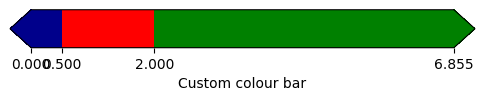

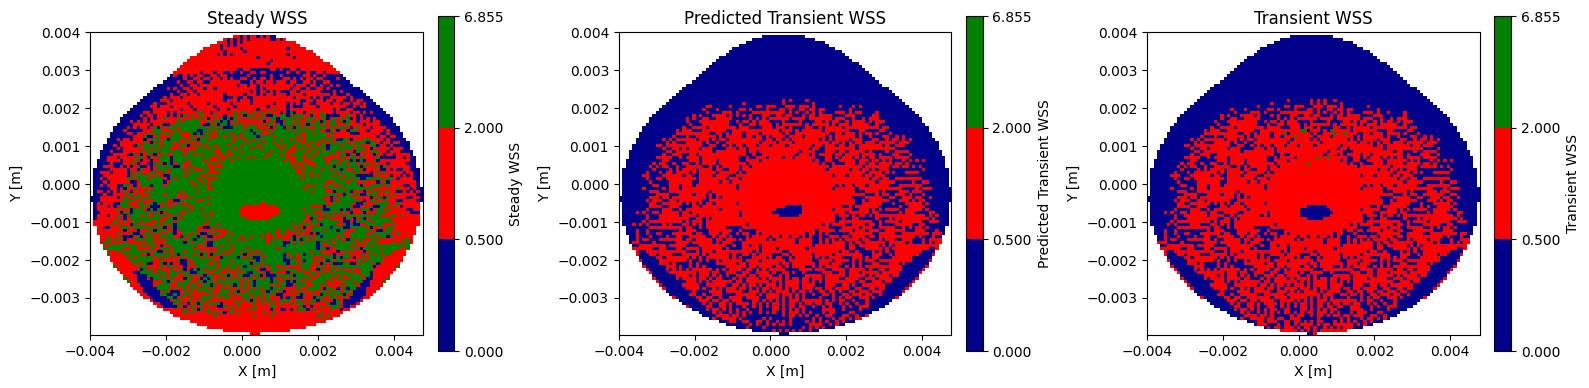

In [20]:
import matplotlib as mpl
# Generate your grid
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]

# Interpolate the velocity onto the grid
grid_WSS0 = griddata((x, y), ste_velocity, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS1 = griddata((x, y), velocity, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS2 = griddata((x, y), velocity_truth, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS3 = griddata((x, y), diff_vel, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS4 = griddata((x, y), diff_ste, (grid_x, grid_y), method='linear', fill_value=np.nan)

max_value = np.nanmax([grid_WSS0])

colours = ['darkblue', 'red', 'green']
bins = [0, 0.5, 2, max_value]
assert len(bins) == len(colours) + 1

cmap = mpl.colors.ListedColormap(colours)
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=len(cmap.colors))

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=bins,
                                extend='both',
                                ticks=bins,
                                spacing='proportional',
                                orientation='horizontal')
cb2.set_label('Custom colour bar')
plt.show()
masked_WSS0 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS0), grid_WSS0)
masked_WSS1 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS1), grid_WSS1)
masked_WSS2 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS2), grid_WSS2)
masked_WSS3 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS3), grid_WSS3)
masked_WSS4 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS4), grid_WSS4)
#cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Rotate the data
rotated_masked_WSS0 = np.rot90(masked_WSS0, 1)
rotated_masked_WSS1 = np.rot90(masked_WSS1, 1)
rotated_masked_WSS2 = np.rot90(masked_WSS2, 1)
rotated_masked_WSS3 = np.rot90(masked_WSS3, 1)
rotated_masked_WSS4 = np.rot90(masked_WSS4, 1)

# Generate heat maps for velocity
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 26))
fig.patch.set_facecolor('white')

im0 = ax0.imshow(rotated_masked_WSS0.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, norm=norm)
fig.colorbar(im0, ax=ax0, label='Steady WSS', fraction=0.046, pad=0.04)
ax0.set_title('Steady WSS')
ax0.set_xlabel("X [m]")
ax0.set_ylabel("Y [m]")

im1 = ax1.imshow(rotated_masked_WSS1.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, norm=norm)
fig.colorbar(im1, ax=ax1, label='Predicted Transient WSS', fraction=0.046, pad=0.04)
ax1.set_title('Predicted Transient WSS')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Y [m]")

im2 = ax2.imshow(rotated_masked_WSS2.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, norm=norm)
fig.colorbar(im2, ax=ax2, label='Transient WSS', fraction=0.046, pad=0.04)
ax2.set_title('Transient WSS')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Y [m]")
plt.tight_layout()
plt.show()

# **RESULT N41**

In [21]:
PredictedTransient1 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N41MS.csv')
# Print column names
print(PredictedTransient1.columns)
PredictedTransient1 = PredictedTransient1.fillna(0)
PredictedTransient1 = PredictedTransient1.replace(' null', np.nan)
x = PredictedTransient1[' X [ m ]']
y = PredictedTransient1[' Y [ m ]']
ste_velocity1 = PredictedTransient1[' Wall Shear [ Pa ]']
velocity1 = PredictedTransient1['Transient Prediction 1']
diff_ste1 = PredictedTransient1['Transient Prediction 1'] - PredictedTransient1[' Wall Shear [ Pa ]']
CFDTransient1 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N41Tlow\N41TS2.csv')
print(CFDTransient1.columns)
CFDTransient1 = CFDTransient1.fillna(0)
CFDTransient1 = CFDTransient1.replace(' null', np.nan)
x = CFDTransient1 [' X [ m ]']
y = CFDTransient1 [' Y [ m ]']
velocity_truth1 = CFDTransient1 [' Wall Shear [ Pa ]']
diff_vel1 = PredictedTransient1['Transient Prediction 1'] - CFDTransient1[' Wall Shear [ Pa ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]', ' Wall Shear [ Pa ]',
       'Transient Prediction 1'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Wall Shear [ Pa ]'],
      dtype='object')


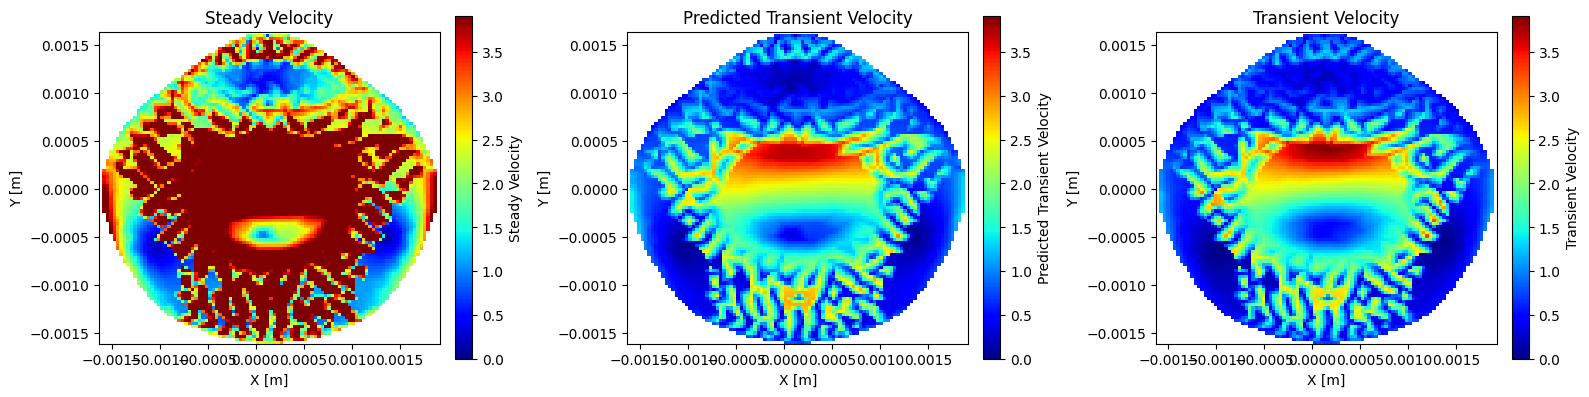

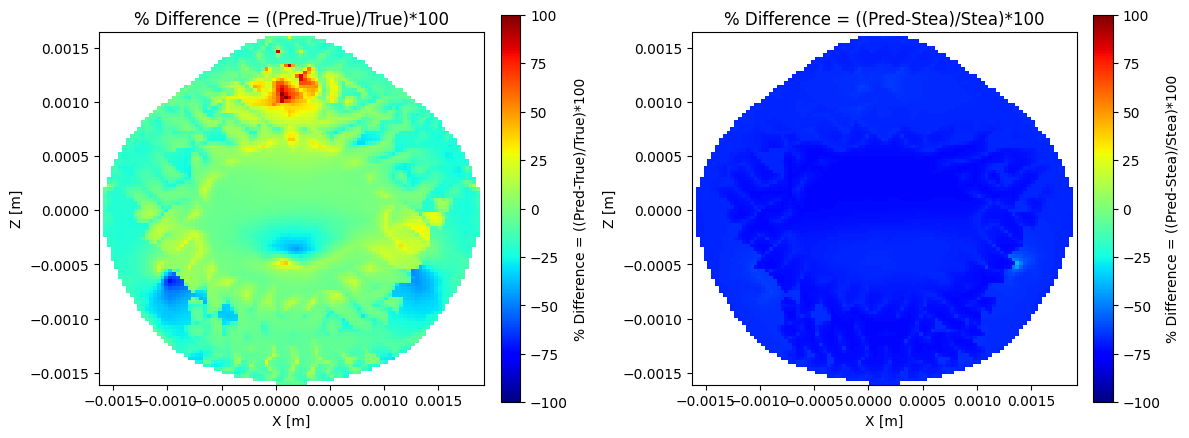

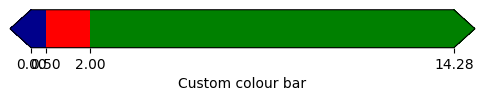

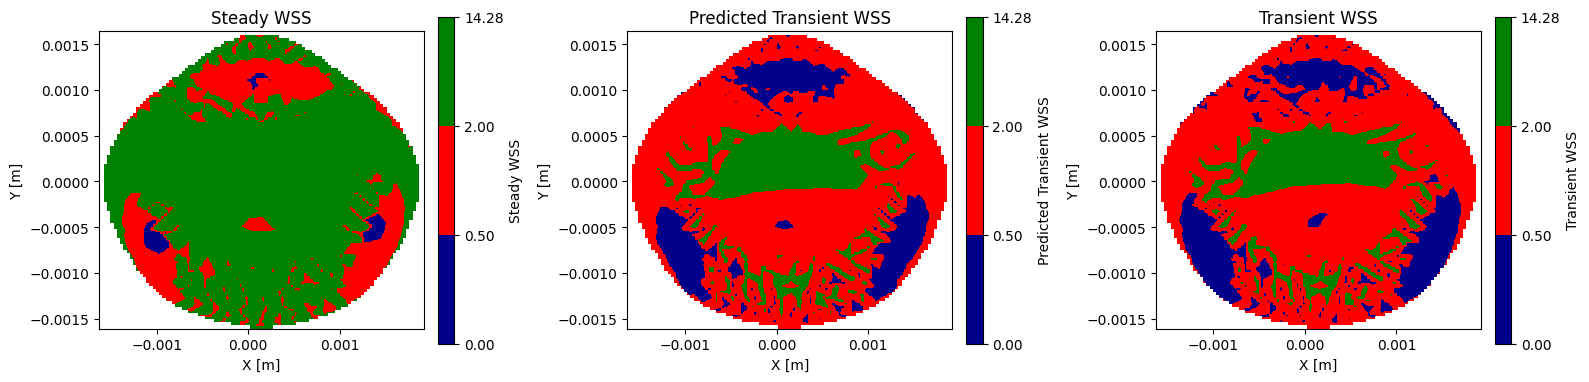

In [22]:
# Generate grid
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]

# Interpolation for velocity
grid_velocity0 = griddata((x, y), ste_velocity1, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, y), velocity1, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, y), velocity_truth1, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, y), diff_vel1, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, y), diff_ste1, (grid_x, grid_y), method='linear', fill_value=np.nan)

# Color mapping
cmap = plt.cm.jet  
cmap.set_bad(color='white')

# Masking operations
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities
rotated_masked_velocity0 = np.rot90(masked_velocity0, 1)
rotated_masked_velocity1 = np.rot90(masked_velocity1, 1)
rotated_masked_velocity2 = np.rot90(masked_velocity2, 1)

# Plot velocities
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 26))
fig.patch.set_facecolor('white')

im0 = ax0.imshow(rotated_masked_velocity0.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im0, ax=ax0, label='Steady Velocity',fraction=0.046, pad=0.04)
ax0.set_title('Steady Velocity')
ax0.set_xlabel("X [m]")
ax0.set_ylabel("Y [m]")

im1 = ax1.imshow(rotated_masked_velocity1.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.046, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Y [m]")

im2 = ax2.imshow(rotated_masked_velocity2.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.046, pad=0.04)
ax2.set_title('Transient Velocity')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Y [m]")

plt.tight_layout()
plt.show()

# Calculate % differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100

# Plot % differences
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 12))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(percentage_change3.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='% Difference = ((Pred-True)/True)*100', fraction=0.046, pad=0.04)
ax3.set_title('% Difference = ((Pred-True)/True)*100')
ax3.set_xlabel("X [m]")
ax3.set_ylabel("Z [m]")

im4 = ax4.imshow(percentage_change4.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='% Difference = ((Pred-Stea)/Stea)*100', fraction=0.046, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("X [m]")
ax4.set_ylabel("Z [m]")

plt.tight_layout()
plt.show()
grid_WSS0 = griddata((x, y), ste_velocity1, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS1 = griddata((x, y), velocity1, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS2 = griddata((x, y), velocity_truth1, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS3 = griddata((x, y), diff_vel1, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS4 = griddata((x, y), diff_ste1, (grid_x, grid_y), method='linear', fill_value=np.nan)

# Color mapping setup
max_value = np.nanmax([grid_WSS0])
colours = ['darkblue', 'red', 'green']
bins = [0, 0.5, 2, max_value]
assert len(bins) == len(colours) + 1

cmap = mpl.colors.ListedColormap(colours)
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=len(cmap.colors))

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=bins,
                                extend='both',
                                ticks=bins,
                                spacing='proportional',
                                orientation='horizontal')
cb2.set_label('Custom colour bar')
plt.show()

cmap.set_bad(color='white')

# Masking operations
masked_WSS0 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS0), grid_WSS0)
masked_WSS1 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS1), grid_WSS1)
masked_WSS2 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS2), grid_WSS2)
masked_WSS3 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS3), grid_WSS3)
masked_WSS4 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS4), grid_WSS4)

# Rotate the masked WSS
rotated_masked_WSS0 = np.rot90(masked_WSS0, 1)
rotated_masked_WSS1 = np.rot90(masked_WSS1, 1)
rotated_masked_WSS2 = np.rot90(masked_WSS2, 1)

# Plot WSS
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 26))
fig.patch.set_facecolor('white')

im0 = ax0.imshow(rotated_masked_WSS0.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, norm=norm)
fig.colorbar(im0, ax=ax0, label='Steady WSS', fraction=0.046, pad=0.04)
ax0.set_title('Steady WSS')
ax0.set_xlabel("X [m]")
ax0.set_ylabel("Y [m]")

im1 = ax1.imshow(rotated_masked_WSS1.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, norm=norm)
fig.colorbar(im1, ax=ax1, label='Predicted Transient WSS', fraction=0.046, pad=0.04)
ax1.set_title('Predicted Transient WSS')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Y [m]")

im2 = ax2.imshow(rotated_masked_WSS2.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, norm=norm)
fig.colorbar(im2, ax=ax2, label='Transient WSS', fraction=0.046, pad=0.04)
ax2.set_title('Transient WSS')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Y [m]")

plt.tight_layout()
plt.show()

In [23]:
max_shear = np.max(Prediction1)
print(f"Maximum shear from the prediction is: {max_shear}")
max_shear2 = CFDTransient1[' Wall Shear [ Pa ]'].max()
print(f"Maximum shear from the actual is: {max_shear2}")

min_shear = np.min(Prediction1)
print(f"Min shear from the prediction is: {min_shear}")
min_shear2 = CFDTransient1[' Wall Shear [ Pa ]'].min()
print(f"Min shear from the actual is: {min_shear2}")

relative_error = abs(max_shear - max_shear2) / abs(max_shear2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient1[' Wall Shear [ Pa ]'], Prediction1)
print(r2)
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

average_percentage_change3, average_percentage_change4

Maximum shear from the prediction is: 3.7174054195708144
Maximum shear from the actual is: 3.94
Min shear from the prediction is: 0.05098846388115552
Min shear from the actual is: 0.0197
% is: 5.64960864033466
0.9581958054925831


(12.353001391017544, 69.54116000757794)

# **RESULT N42**

In [24]:
PredictedTransient2 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N42MS.csv')
# Print column names
print(PredictedTransient2.columns)
PredictedTransient2 = PredictedTransient2.fillna(0)
PredictedTransient2 = PredictedTransient2.replace(' null', np.nan)
x = PredictedTransient2[' X [ m ]']
y = PredictedTransient2[' Y [ m ]']
ste_velocity2 = PredictedTransient2[' Wall Shear [ Pa ]']
velocity2 = PredictedTransient2['Transient Prediction 2']
diff_ste2 = PredictedTransient2['Transient Prediction 2'] - PredictedTransient2[' Wall Shear [ Pa ]']
CFDTransient2 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N42Tlow\N42TS2.csv')
print(CFDTransient2.columns)
CFDTransient2 = CFDTransient2.fillna(0)
CFDTransient2 = CFDTransient2.replace(' null', np.nan)
x = CFDTransient2 [' X [ m ]']
y = CFDTransient2 [' Y [ m ]']
velocity_truth2 = CFDTransient2 [' Wall Shear [ Pa ]']
diff_vel2 = PredictedTransient2['Transient Prediction 2'] - CFDTransient2[' Wall Shear [ Pa ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]', ' Wall Shear [ Pa ]',
       'Transient Prediction 2'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Wall Shear [ Pa ]'],
      dtype='object')


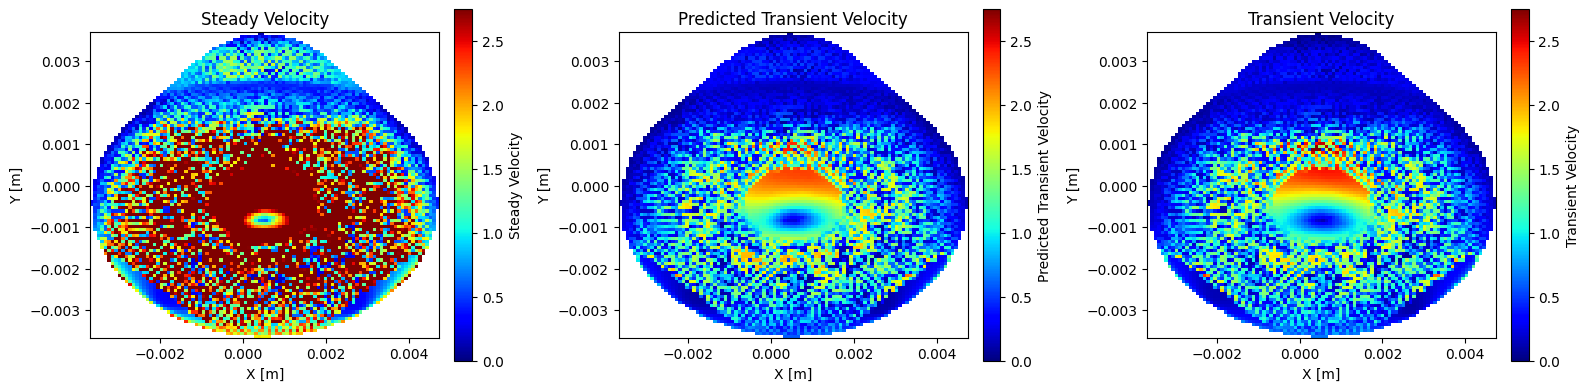

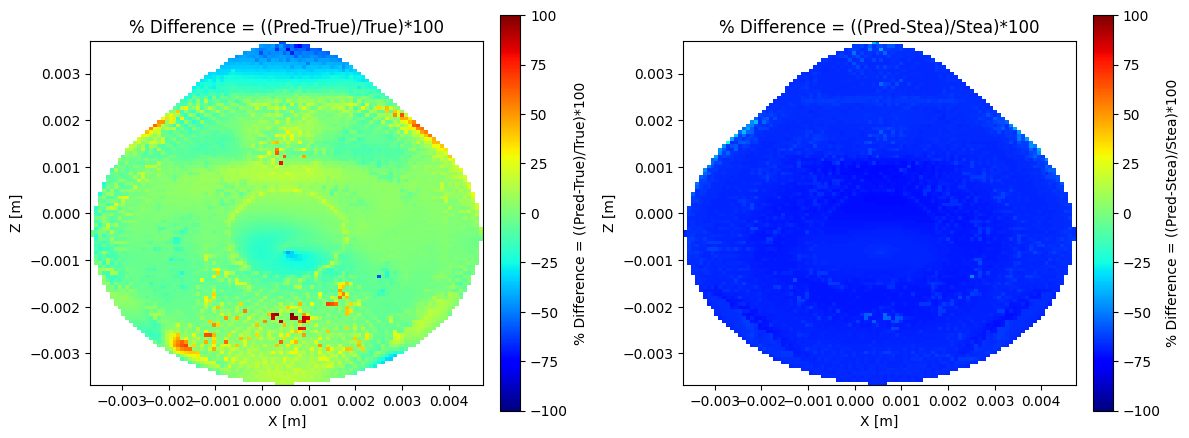

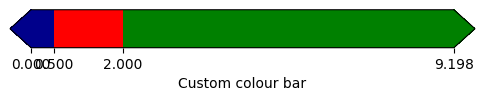

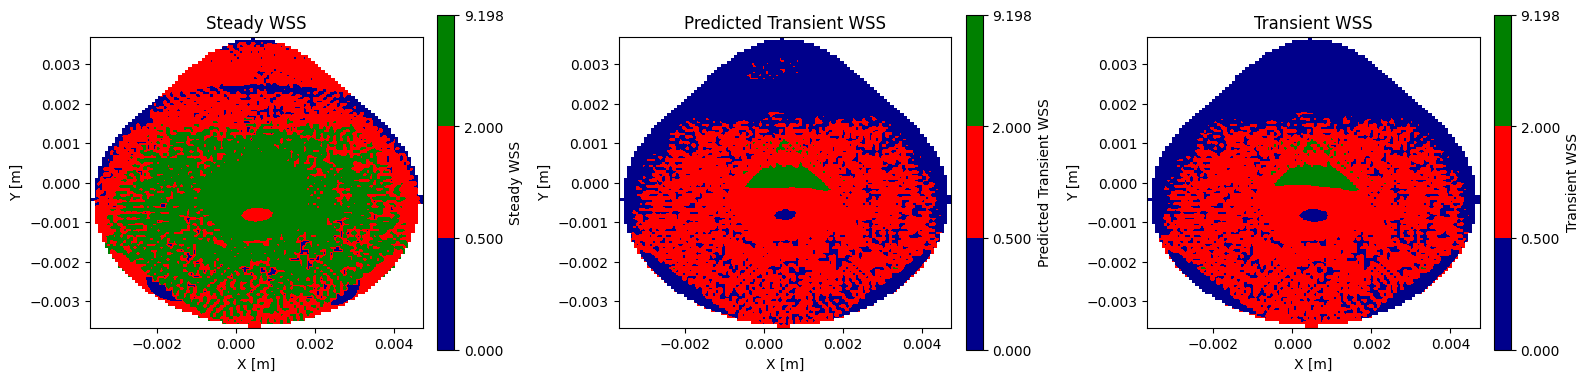

In [25]:
# Generate grid
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]

# Interpolation for velocity
grid_velocity0 = griddata((x, y), ste_velocity2, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, y), velocity2, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, y), velocity_truth2, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, y), diff_vel2, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, y), diff_ste2, (grid_x, grid_y), method='linear', fill_value=np.nan)

# Color mapping
cmap = plt.cm.jet  
cmap.set_bad(color='white')

# Masking operations
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities
rotated_masked_velocity0 = np.rot90(masked_velocity0, 1)
rotated_masked_velocity1 = np.rot90(masked_velocity1, 1)
rotated_masked_velocity2 = np.rot90(masked_velocity2, 1)

# Plot velocities
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 26))
fig.patch.set_facecolor('white')

im0 = ax0.imshow(rotated_masked_velocity0.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im0, ax=ax0, label='Steady Velocity',fraction=0.046, pad=0.04)
ax0.set_title('Steady Velocity')
ax0.set_xlabel("X [m]")
ax0.set_ylabel("Y [m]")

im1 = ax1.imshow(rotated_masked_velocity1.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.046, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Y [m]")

im2 = ax2.imshow(rotated_masked_velocity2.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.046, pad=0.04)
ax2.set_title('Transient Velocity')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Y [m]")

plt.tight_layout()
plt.show()

# Calculate % differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100

# Plot % differences
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 12))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(percentage_change3.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='% Difference = ((Pred-True)/True)*100', fraction=0.046, pad=0.04)
ax3.set_title('% Difference = ((Pred-True)/True)*100')
ax3.set_xlabel("X [m]")
ax3.set_ylabel("Z [m]")

im4 = ax4.imshow(percentage_change4.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='% Difference = ((Pred-Stea)/Stea)*100', fraction=0.046, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("X [m]")
ax4.set_ylabel("Z [m]")

plt.tight_layout()
plt.show()
grid_WSS0 = griddata((x, y), ste_velocity2, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS1 = griddata((x, y), velocity2, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS2 = griddata((x, y), velocity_truth2, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS3 = griddata((x, y), diff_vel2, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS4 = griddata((x, y), diff_ste2, (grid_x, grid_y), method='linear', fill_value=np.nan)

# Color mapping setup
max_value = np.nanmax([grid_WSS0])
colours = ['darkblue', 'red', 'green']
bins = [0, 0.5, 2, max_value]
assert len(bins) == len(colours) + 1

cmap = mpl.colors.ListedColormap(colours)
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=len(cmap.colors))

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=bins,
                                extend='both',
                                ticks=bins,
                                spacing='proportional',
                                orientation='horizontal')
cb2.set_label('Custom colour bar')
plt.show()

cmap.set_bad(color='white')

# Masking operations
masked_WSS0 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS0), grid_WSS0)
masked_WSS1 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS1), grid_WSS1)
masked_WSS2 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS2), grid_WSS2)
masked_WSS3 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS3), grid_WSS3)
masked_WSS4 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS4), grid_WSS4)

# Rotate the masked WSS
rotated_masked_WSS0 = np.rot90(masked_WSS0, 1)
rotated_masked_WSS1 = np.rot90(masked_WSS1, 1)
rotated_masked_WSS2 = np.rot90(masked_WSS2, 1)

# Plot WSS
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 26))
fig.patch.set_facecolor('white')

im0 = ax0.imshow(rotated_masked_WSS0.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, norm=norm)
fig.colorbar(im0, ax=ax0, label='Steady WSS', fraction=0.046, pad=0.04)
ax0.set_title('Steady WSS')
ax0.set_xlabel("X [m]")
ax0.set_ylabel("Y [m]")

im1 = ax1.imshow(rotated_masked_WSS1.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, norm=norm)
fig.colorbar(im1, ax=ax1, label='Predicted Transient WSS', fraction=0.046, pad=0.04)
ax1.set_title('Predicted Transient WSS')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Y [m]")

im2 = ax2.imshow(rotated_masked_WSS2.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, norm=norm)
fig.colorbar(im2, ax=ax2, label='Transient WSS', fraction=0.046, pad=0.04)
ax2.set_title('Transient WSS')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Y [m]")

plt.tight_layout()
plt.show()

In [26]:
max_shear = np.max(Prediction2)
print(f"Maximum shear from the prediction is: {max_shear}")
max_shear2 = CFDTransient2[' Wall Shear [ Pa ]'].max()
print(f"Maximum shear from the actual is: {max_shear2}")

min_shear = np.min(Prediction2)
print(f"Min shear from the prediction is: {min_shear}")
min_shear2 = CFDTransient2[' Wall Shear [ Pa ]'].min()
print(f"Min shear from the actual is: {min_shear2}")

relative_error = abs(max_shear - max_shear2) / abs(max_shear2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient2[' Wall Shear [ Pa ]'], Prediction2)
print(r2)
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

average_percentage_change3, average_percentage_change4

Maximum shear from the prediction is: 2.4695283165333644
Maximum shear from the actual is: 2.75
Min shear from the prediction is: 0.0437757692176054
Min shear from the actual is: 0.00378
% is: 10.19897030787766
0.9880756353943834


(8.922792497293038, 67.50339223990744)

# **RESULT N43**

In [27]:
PredictedTransient3 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N43MS.csv')
# Print column namesD
print(PredictedTransient3.columns)
PredictedTransient3 = PredictedTransient3.fillna(0)
PredictedTransient3 = PredictedTransient3.replace(' null', np.nan)
x = PredictedTransient3[' X [ m ]']
y = PredictedTransient3[' Y [ m ]']
ste_velocity3 = PredictedTransient3[' Wall Shear [ Pa ]']
velocity3 = PredictedTransient3['Transient Prediction 3']
diff_ste3 = PredictedTransient3['Transient Prediction 3'] - PredictedTransient3[' Wall Shear [ Pa ]']
CFDTransient3 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N43Tlow\N43TS2.csv')
print(CFDTransient3.columns)
CFDTransient3 = CFDTransient3.fillna(0)
CFDTransient3 = CFDTransient3.replace(' null', np.nan)
x = CFDTransient3 [' X [ m ]']
y = CFDTransient3 [' Y [ m ]']
velocity_truth3 = CFDTransient3 [' Wall Shear [ Pa ]']
diff_vel3 = PredictedTransient3['Transient Prediction 3'] - CFDTransient3[' Wall Shear [ Pa ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]', ' Wall Shear [ Pa ]',
       'Transient Prediction 3'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Wall Shear [ Pa ]'],
      dtype='object')


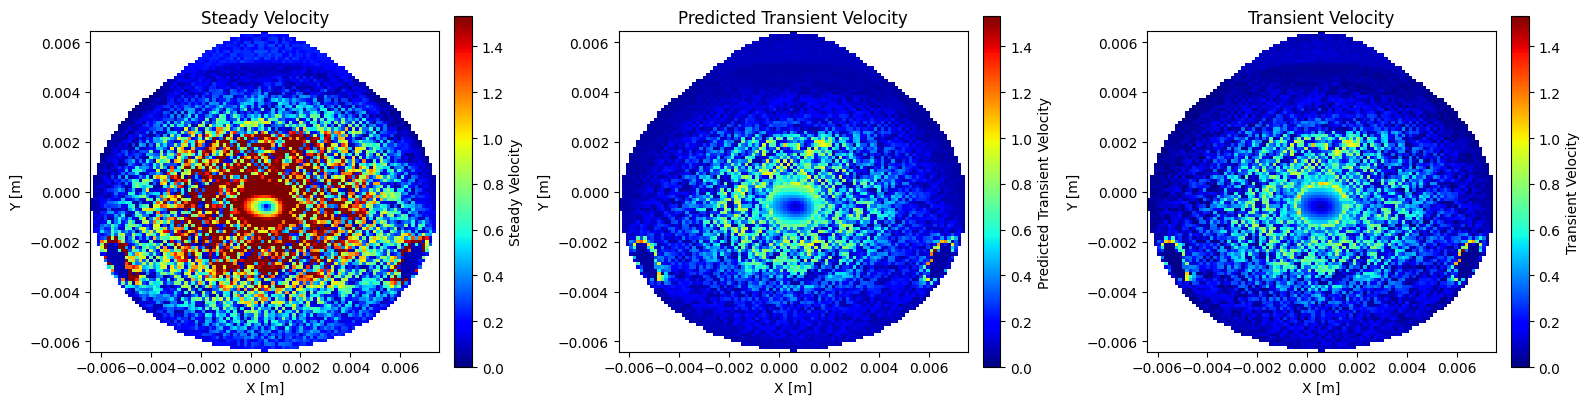

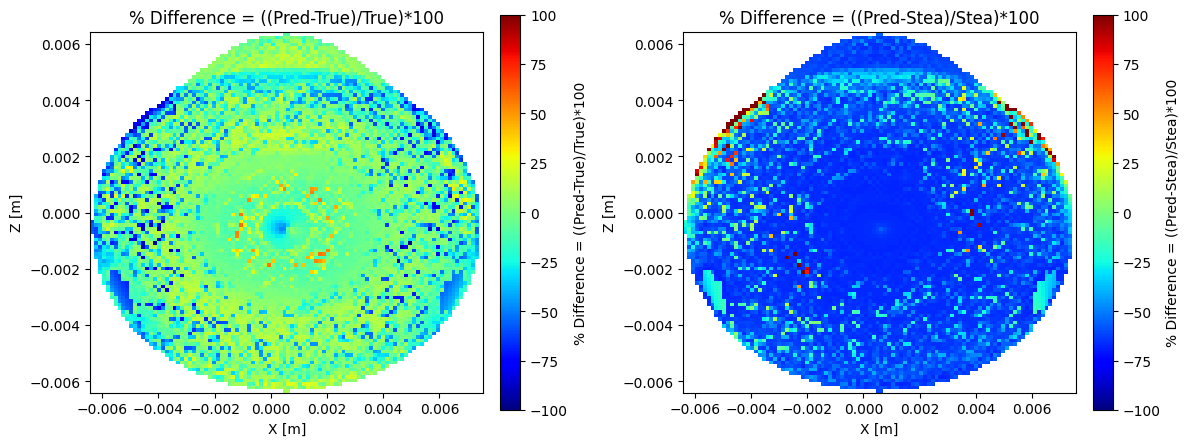

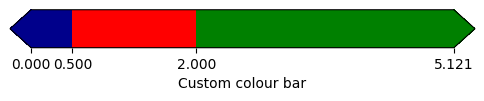

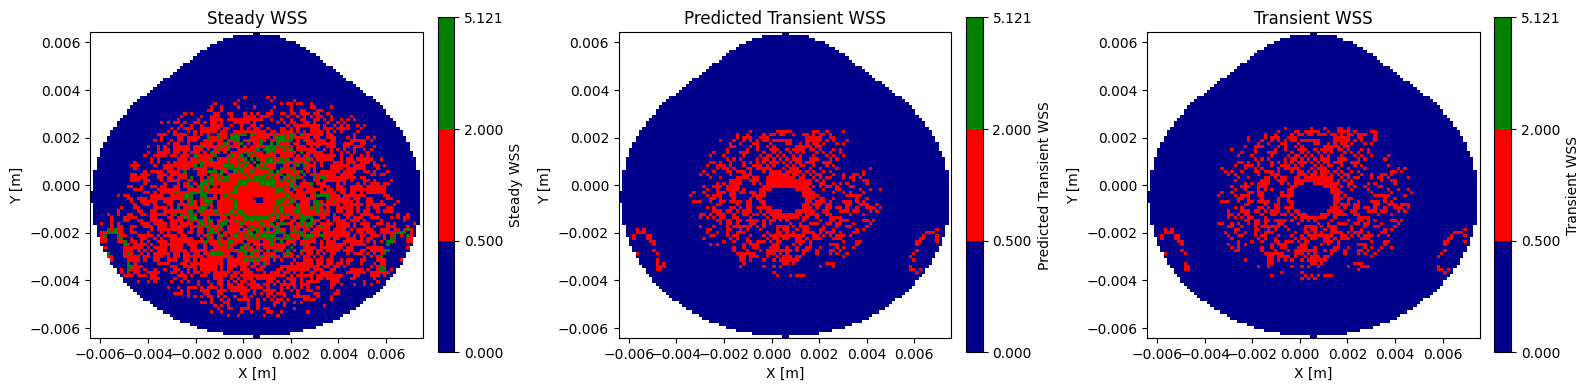

Maximum shear from the prediction is: 2.138665946107081
Maximum shear from the actual is: 2.12
Min shear from the prediction is: 0.03751471964100739
Min shear from the actual is: 0.0006
% is: 0.8804691559943894
0.9743858133310304


(15.828770376595312, 57.73419571856531)

In [28]:
# Generate grid
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]

# Interpolation for velocity
grid_velocity0 = griddata((x, y), ste_velocity3, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, y), velocity3, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, y), velocity_truth3, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, y), diff_vel3, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, y), diff_ste3, (grid_x, grid_y), method='linear', fill_value=np.nan)

# Color mapping
cmap = plt.cm.jet  
cmap.set_bad(color='white')

# Masking operations
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities
rotated_masked_velocity0 = np.rot90(masked_velocity0, 1)
rotated_masked_velocity1 = np.rot90(masked_velocity1, 1)
rotated_masked_velocity2 = np.rot90(masked_velocity2, 1)

# Plot velocities
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 26))
fig.patch.set_facecolor('white')

im0 = ax0.imshow(rotated_masked_velocity0.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im0, ax=ax0, label='Steady Velocity',fraction=0.046, pad=0.04)
ax0.set_title('Steady Velocity')
ax0.set_xlabel("X [m]")
ax0.set_ylabel("Y [m]")

im1 = ax1.imshow(rotated_masked_velocity1.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.046, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Y [m]")

im2 = ax2.imshow(rotated_masked_velocity2.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.046, pad=0.04)
ax2.set_title('Transient Velocity')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Y [m]")

plt.tight_layout()
plt.show()

# Calculate % differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100

# Plot % differences
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 12))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(percentage_change3.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='% Difference = ((Pred-True)/True)*100', fraction=0.046, pad=0.04)
ax3.set_title('% Difference = ((Pred-True)/True)*100')
ax3.set_xlabel("X [m]")
ax3.set_ylabel("Z [m]")

im4 = ax4.imshow(percentage_change4.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='% Difference = ((Pred-Stea)/Stea)*100', fraction=0.046, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("X [m]")
ax4.set_ylabel("Z [m]")

plt.tight_layout()
plt.show()
grid_WSS0 = griddata((x, y), ste_velocity3, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS1 = griddata((x, y), velocity3, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS2 = griddata((x, y), velocity_truth3, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS3 = griddata((x, y), diff_vel3, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS4 = griddata((x, y), diff_ste3, (grid_x, grid_y), method='linear', fill_value=np.nan)

# Color mapping setup
max_value = np.nanmax([grid_WSS0])
colours = ['darkblue', 'red', 'green']
bins = [0, 0.5, 2, max_value]
assert len(bins) == len(colours) + 1

cmap = mpl.colors.ListedColormap(colours)
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=len(cmap.colors))

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=bins,
                                extend='both',
                                ticks=bins,
                                spacing='proportional',
                                orientation='horizontal')
cb2.set_label('Custom colour bar')
plt.show()

cmap.set_bad(color='white')

# Masking operations
masked_WSS0 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS0), grid_WSS0)
masked_WSS1 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS1), grid_WSS1)
masked_WSS2 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS2), grid_WSS2)
masked_WSS3 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS3), grid_WSS3)
masked_WSS4 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS4), grid_WSS4)

# Rotate the masked WSS
rotated_masked_WSS0 = np.rot90(masked_WSS0, 1)
rotated_masked_WSS1 = np.rot90(masked_WSS1, 1)
rotated_masked_WSS2 = np.rot90(masked_WSS2, 1)

# Plot WSS
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 26))
fig.patch.set_facecolor('white')

im0 = ax0.imshow(rotated_masked_WSS0.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, norm=norm)
fig.colorbar(im0, ax=ax0, label='Steady WSS', fraction=0.046, pad=0.04)
ax0.set_title('Steady WSS')
ax0.set_xlabel("X [m]")
ax0.set_ylabel("Y [m]")

im1 = ax1.imshow(rotated_masked_WSS1.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, norm=norm)
fig.colorbar(im1, ax=ax1, label='Predicted Transient WSS', fraction=0.046, pad=0.04)
ax1.set_title('Predicted Transient WSS')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Y [m]")

im2 = ax2.imshow(rotated_masked_WSS2.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, norm=norm)
fig.colorbar(im2, ax=ax2, label='Transient WSS', fraction=0.046, pad=0.04)
ax2.set_title('Transient WSS')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Y [m]")

plt.tight_layout()
plt.show()


max_shear = np.max(Prediction3)
print(f"Maximum shear from the prediction is: {max_shear}")
max_shear2 = CFDTransient3[' Wall Shear [ Pa ]'].max()
print(f"Maximum shear from the actual is: {max_shear2}")

min_shear = np.min(Prediction3)
print(f"Min shear from the prediction is: {min_shear}")
min_shear2 = CFDTransient3[' Wall Shear [ Pa ]'].min()
print(f"Min shear from the actual is: {min_shear2}")

relative_error = abs(max_shear - max_shear2) / abs(max_shear2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient3[' Wall Shear [ Pa ]'], Prediction3)
print(r2)
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

average_percentage_change3, average_percentage_change4

# **RESULT N44**

In [30]:
PredictedTransient4 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N44MS.csv')
# Print column names
print(PredictedTransient4.columns)
PredictedTransient4 = PredictedTransient4.fillna(0)
PredictedTransient4 = PredictedTransient4.replace(' null', np.nan)
x = PredictedTransient4[' X [ m ]']
y = PredictedTransient4[' Y [ m ]']
ste_velocity4 = PredictedTransient4[' Wall Shear [ Pa ]']
velocity4 = PredictedTransient4['Transient Prediction 4']
diff_ste4 = PredictedTransient4['Transient Prediction 4'] - PredictedTransient4[' Wall Shear [ Pa ]']
CFDTransient4 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\Predictions\N44Tlow\N44TS2.csv')
print(CFDTransient4.columns)
CFDTransient4 = CFDTransient4.fillna(0)
CFDTransient4 = CFDTransient4.replace(' null', np.nan)
x = CFDTransient4 [' X [ m ]']
y = CFDTransient4 [' Y [ m ]']
velocity_truth4 = CFDTransient4 [' Wall Shear [ Pa ]']
diff_vel4 = PredictedTransient4 ['Transient Prediction 4'] - CFDTransient4[' Wall Shear [ Pa ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]', ' Wall Shear [ Pa ]',
       'Transient Prediction 4'],
      dtype='object')
Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Wall Shear [ Pa ]'],
      dtype='object')


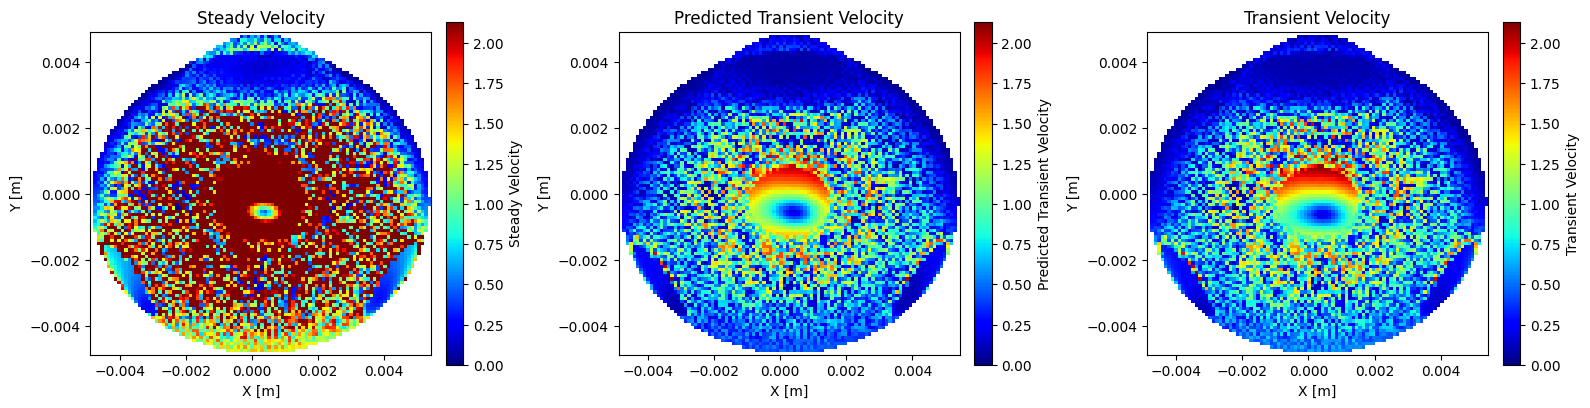

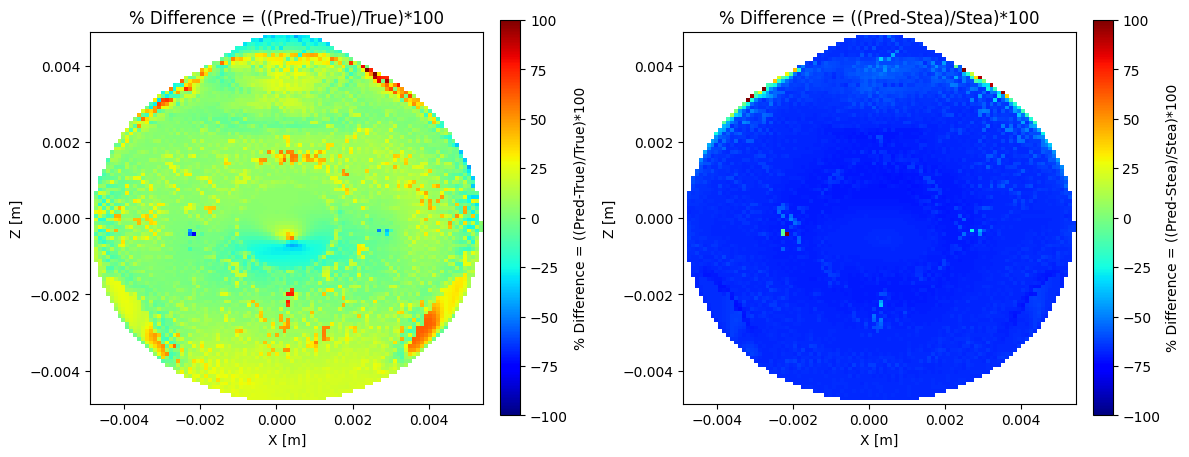

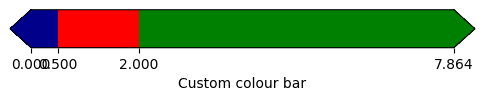

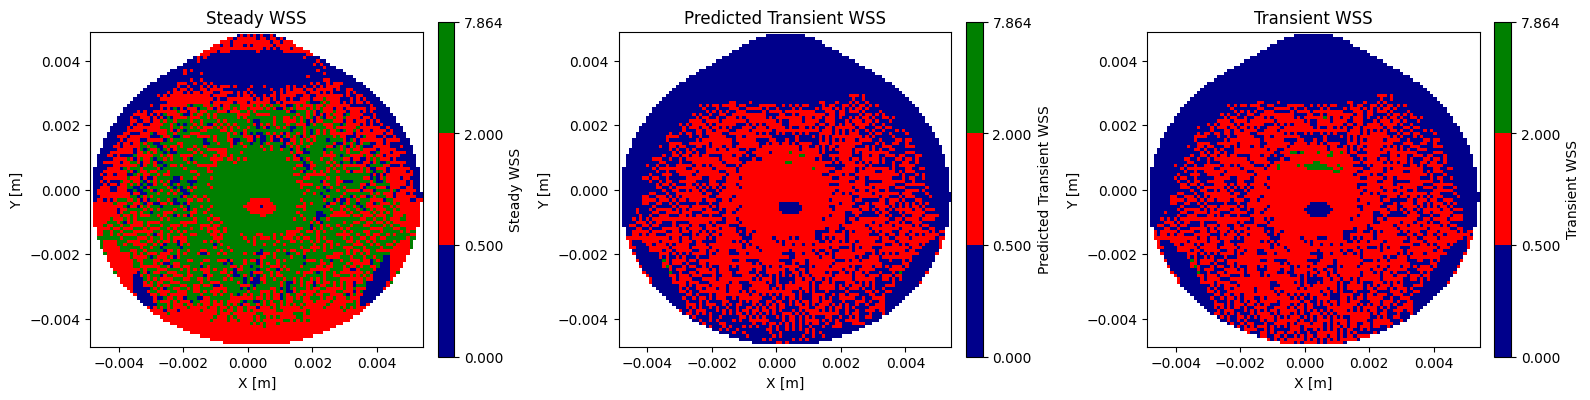

Maximum shear from the prediction is: 2.3661641425884326
Maximum shear from the actual is: 2.31
Min shear from the prediction is: 0.03800991957313182
Min shear from the actual is: 0.00778
% is: 2.431348164001407
0.9856265650668734


(11.275348286225839, 66.0812526317423)

In [31]:
# Generate grid
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]

# Interpolation for velocity
grid_velocity0 = griddata((x, y), ste_velocity4, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, y), velocity4, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, y), velocity_truth4, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, y), diff_vel4, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, y), diff_ste4, (grid_x, grid_y), method='linear', fill_value=np.nan)

# Color mapping
cmap = plt.cm.jet  
cmap.set_bad(color='white')

# Masking operations
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Rotate the masked velocities
rotated_masked_velocity0 = np.rot90(masked_velocity0, 1)
rotated_masked_velocity1 = np.rot90(masked_velocity1, 1)
rotated_masked_velocity2 = np.rot90(masked_velocity2, 1)

# Plot velocities
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 26))
fig.patch.set_facecolor('white')

im0 = ax0.imshow(rotated_masked_velocity0.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im0, ax=ax0, label='Steady Velocity',fraction=0.046, pad=0.04)
ax0.set_title('Steady Velocity')
ax0.set_xlabel("X [m]")
ax0.set_ylabel("Y [m]")

im1 = ax1.imshow(rotated_masked_velocity1.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.046, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Y [m]")

im2 = ax2.imshow(rotated_masked_velocity2.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, vmin=0, vmax=rotated_masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.046, pad=0.04)
ax2.set_title('Transient Velocity')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Y [m]")

plt.tight_layout()
plt.show()

# Calculate % differences
percentage_change3 = ((rotated_masked_velocity2 - rotated_masked_velocity1) / rotated_masked_velocity1) * 100
percentage_change4 = ((rotated_masked_velocity1 - rotated_masked_velocity0) / rotated_masked_velocity0) * 100

# Plot % differences
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 12))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(percentage_change3.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='% Difference = ((Pred-True)/True)*100', fraction=0.046, pad=0.04)
ax3.set_title('% Difference = ((Pred-True)/True)*100')
ax3.set_xlabel("X [m]")
ax3.set_ylabel("Z [m]")

im4 = ax4.imshow(percentage_change4.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='% Difference = ((Pred-Stea)/Stea)*100', fraction=0.046, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("X [m]")
ax4.set_ylabel("Z [m]")

plt.tight_layout()
plt.show()
grid_WSS0 = griddata((x, y), ste_velocity4, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS1 = griddata((x, y), velocity4, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS2 = griddata((x, y), velocity_truth4, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS3 = griddata((x, y), diff_vel4, (grid_x, grid_y), method='linear', fill_value=np.nan)
grid_WSS4 = griddata((x, y), diff_ste4, (grid_x, grid_y), method='linear', fill_value=np.nan)

# Color mapping setup
max_value = np.nanmax([grid_WSS0])
colours = ['darkblue', 'red', 'green']
bins = [0, 0.5, 2, max_value]
assert len(bins) == len(colours) + 1

cmap = mpl.colors.ListedColormap(colours)
norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=len(cmap.colors))

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=bins,
                                extend='both',
                                ticks=bins,
                                spacing='proportional',
                                orientation='horizontal')
cb2.set_label('Custom colour bar')
plt.show()

cmap.set_bad(color='white')

# Masking operations
masked_WSS0 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS0), grid_WSS0)
masked_WSS1 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS1), grid_WSS1)
masked_WSS2 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS2), grid_WSS2)
masked_WSS3 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS3), grid_WSS3)
masked_WSS4 = ma.masked_where((grid_WSS0 <= 0.0001) | np.isnan(grid_WSS4), grid_WSS4)

# Rotate the masked WSS
rotated_masked_WSS0 = np.rot90(masked_WSS0, 1)
rotated_masked_WSS1 = np.rot90(masked_WSS1, 1)
rotated_masked_WSS2 = np.rot90(masked_WSS2, 1)

# Plot WSS
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 26))
fig.patch.set_facecolor('white')

im0 = ax0.imshow(rotated_masked_WSS0.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, norm=norm)
fig.colorbar(im0, ax=ax0, label='Steady WSS', fraction=0.046, pad=0.04)
ax0.set_title('Steady WSS')
ax0.set_xlabel("X [m]")
ax0.set_ylabel("Y [m]")

im1 = ax1.imshow(rotated_masked_WSS1.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, norm=norm)
fig.colorbar(im1, ax=ax1, label='Predicted Transient WSS', fraction=0.046, pad=0.04)
ax1.set_title('Predicted Transient WSS')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Y [m]")

im2 = ax2.imshow(rotated_masked_WSS2.T, extent=(min(x), max(x), min(y), max(y)), origin='lower', cmap=cmap, norm=norm)
fig.colorbar(im2, ax=ax2, label='Transient WSS', fraction=0.046, pad=0.04)
ax2.set_title('Transient WSS')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Y [m]")

plt.tight_layout()
plt.show()


max_shear = np.max(Prediction4)
print(f"Maximum shear from the prediction is: {max_shear}")
max_shear2 = CFDTransient4[' Wall Shear [ Pa ]'].max()
print(f"Maximum shear from the actual is: {max_shear2}")

min_shear = np.min(Prediction4)
print(f"Min shear from the prediction is: {min_shear}")
min_shear2 = CFDTransient4[' Wall Shear [ Pa ]'].min()
print(f"Min shear from the actual is: {min_shear2}")

relative_error = abs(max_shear - max_shear2) / abs(max_shear2)
relative_error_percentage = relative_error * 100  # Convert to percentage

print(f'% is: {relative_error_percentage}')
from sklearn.metrics import r2_score
r2 = r2_score( CFDTransient4[' Wall Shear [ Pa ]'], Prediction4)
print(r2)
average_percentage_change3 = np.mean(np.abs(percentage_change3))
average_percentage_change4 = np.mean(np.abs(percentage_change4))

average_percentage_change3, average_percentage_change4